In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

import nltk
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


True

In [2]:
df=pd.read_csv('Reviews.csv')

In [3]:
df = df.head(500)
print(df.shape)

(500, 10)


In [4]:
ax = df['Score']
ax=ax.value_counts().sort_index()
print(ax)

1     36
2     18
3     37
4     70
5    339
Name: Score, dtype: int64


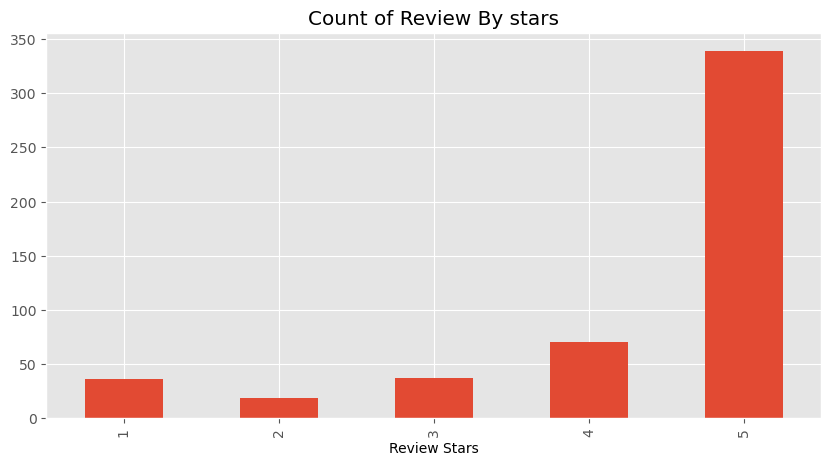

In [5]:
ax.plot(kind='bar',title="Count of Review By stars",figsize=(10,5))
plt.xlabel('Review Stars')
plt.show()


In [6]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [7]:
tokens = nltk.word_tokenize(example)
tokens[:]

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [10]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [15]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [19]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [20]:
sia.polarity_scores('This is the worst thing ever.')


{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [21]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [22]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [26]:
vaders = pd.DataFrame(res).T
print(vaders)

       neg    neu    pos  compound
1    0.000  0.695  0.305    0.9441
2    0.138  0.862  0.000   -0.5664
3    0.091  0.754  0.155    0.8265
4    0.000  1.000  0.000    0.0000
5    0.000  0.552  0.448    0.9468
..     ...    ...    ...       ...
496  0.000  0.554  0.446    0.9725
497  0.059  0.799  0.142    0.7833
498  0.025  0.762  0.212    0.9848
499  0.041  0.904  0.055    0.1280
500  0.000  0.678  0.322    0.9811

[500 rows x 4 columns]


In [27]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
print(vaders)

      Id    neg    neu    pos  compound
0      1  0.000  0.695  0.305    0.9441
1      2  0.138  0.862  0.000   -0.5664
2      3  0.091  0.754  0.155    0.8265
3      4  0.000  1.000  0.000    0.0000
4      5  0.000  0.552  0.448    0.9468
..   ...    ...    ...    ...       ...
495  496  0.000  0.554  0.446    0.9725
496  497  0.059  0.799  0.142    0.7833
497  498  0.025  0.762  0.212    0.9848
498  499  0.041  0.904  0.055    0.1280
499  500  0.000  0.678  0.322    0.9811

[500 rows x 5 columns]


In [28]:
type(vaders)

pandas.core.frame.DataFrame

In [29]:
vaders = vaders.merge(df, how='left')
print(vaders.shape)

(500, 14)


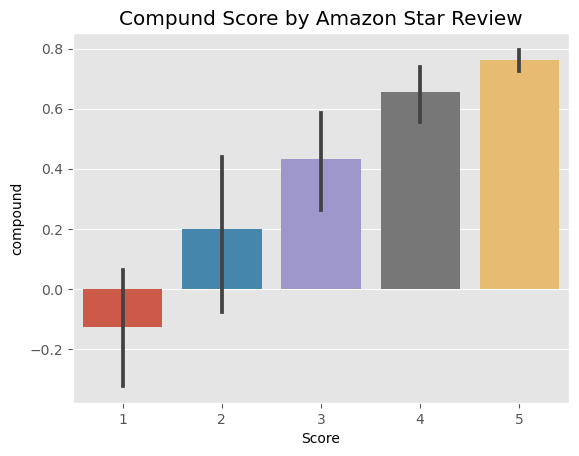

In [30]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()